In [1]:
# Note -- target variable class marking p : 0 and e : 0

#loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mr = pd.read_csv(r"F:\carreer\mushroomsDT.csv") # loading the data

In [3]:
mr.shape

(8124, 23)

In [4]:
mr.head() # getting idea of the data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mr.isnull().sum() # checking the nulls

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
mr['class'] = mr['class'].replace({"p":0,"e":1}) # renaming the target var into the numeric 

In [8]:
mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Converting the data into Non Numeric to numeric

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [10]:
mr[mr.select_dtypes(include = ['object']).columns] = mr[mr.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [11]:
mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [12]:
mr['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

# Data Sampling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
mr_train , mr_test = train_test_split(mr , test_size= .2)

In [15]:
mr_train_x = mr_train.drop(['class'], axis=1)
mr_train_y = mr_train['class']

In [16]:
mr_test_x = mr_test.drop(['class'], axis=1)
mr_test_y = mr_test['class']

# Building the model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(mr_train_x,mr_train_y) # decision tree(model) has been build

DecisionTreeClassifier()

In [20]:
pred = dt.predict(mr_test_x) # predicting x wrt y

# Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix # calling confution matrix library to find precisio, recall , f1_score etc 

In [22]:
tab = confusion_matrix(mr_test_y , pred) # confusion matrix created with top dow pred and left to right actual
tab

array([[754,   0],
       [  0, 871]], dtype=int64)

# Accuracy

In [23]:
from sklearn.metrics import accuracy_score # to find accuracy
accuracy_score(mr_test_y,pred) *100

100.0

# Precision

In [24]:
from sklearn.metrics import precision_score # to find precision
precision_score(mr_test_y,pred) *100

100.0

# F1 ratio

In [25]:
from sklearn.metrics import f1_score # to find the f1 score
f1_score(mr_test_y,pred) *100

100.0

# ROC curve

In [26]:
from sklearn.metrics import roc_auc_score # loading lib to find curve
from sklearn.metrics import roc_curve

In [27]:
roc_auc_score(mr_test_y,pred)*100

100.0

In [28]:
roc_curve(mr_test_y,pred)

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [29]:
pred_prob = dt.predict_proba(mr_test_x) # predicting the probablity
pred_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [30]:
pred_prob.shape

(1625, 2)

In [31]:
fpr,tpr,ther = roc_curve(mr_test_y,pred_prob[:,1]) # storig the value fpr , tpr , threshold
fpr,tpr,ther

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

# Plotting the Graph

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC IS 100.0 ')

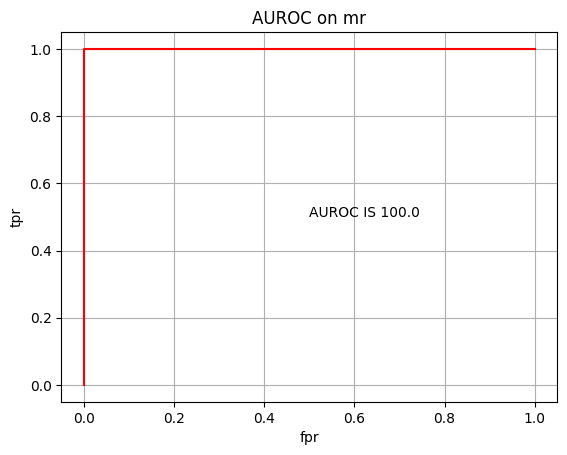

In [33]:
plt.plot(fpr,tpr,color = 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on mr')
plt.grid()
plt.text(x=.5,y=.5, s='AUROC IS 100.0 ')

# Feature_Importance

In [34]:
dt.feature_importances_ # feature importace / significance using DT

array([0.        , 0.        , 0.        , 0.02833356, 0.0383121 ,
       0.        , 0.        , 0.12097676, 0.34031861, 0.02434296,
       0.0164541 , 0.        , 0.00236982, 0.        , 0.01771421,
       0.        , 0.        , 0.00308187, 0.        , 0.20667656,
       0.17591944, 0.0255    ])

In [35]:
dt.feature_importances_.sum()

1.0

In [36]:
len(dt.feature_importances_)

22

In [37]:
mr_train_x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [38]:
# creating data frame of feature and importance
feature_imp= pd.DataFrame({'feature': mr_train_x.columns,'Importance':dt.feature_importances_})
feature_imp

,feature,Importance
0,cap-shape,0.000000
1,cap-surface,0.000000
2,cap-color,0.000000
3,bruises,0.028334
4,odor,0.038312
5,gill-attachment,0.000000
6,gill-spacing,0.000000
7,gill-size,0.120977
8,gill-color,0.340319
9,stalk-shape,0.024343


In [39]:
feature_imp.sort_values('Importance',ascending = False)
# higher the value more importance is the feature 

,feature,Importance
8,gill-color,0.340319
19,spore-print-color,0.206677
20,population,0.175919
7,gill-size,0.120977
4,odor,0.038312
3,bruises,0.028334
21,habitat,0.025500
9,stalk-shape,0.024343
14,stalk-color-below-ring,0.017714
10,stalk-root,0.016454


# Run Again Model for DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=3) # here we have kept depth = 3

In [41]:
dt.fit(mr_train_x , mr_train_y)

DecisionTreeClassifier(max_depth=3)

In [42]:
pred = dt.predict(mr_test_x)
pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [43]:
pred.shape

(1625,)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mr_test_y,pred)

array([[738,  16],
       [ 51, 820]], dtype=int64)

In [45]:
from io import StringIO

In [46]:
dot_data = StringIO()

In [47]:
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot


In [48]:
dot_data = StringIO()


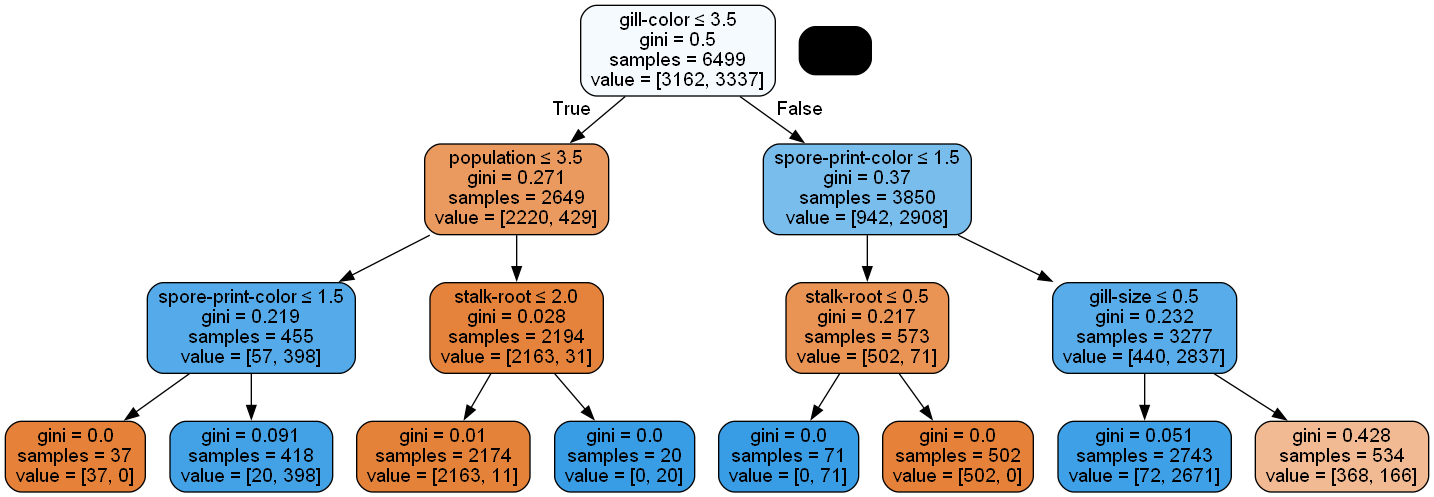

In [49]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=mr_train_x.columns  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# For Entropy repiting the same step declaring criteria = 'Entropy'

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)                    

In [51]:
dt.fit(mr_train_x , mr_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [52]:
pred = dt.predict(mr_test_x)
pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
pred.shape

(1625,)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mr_test_y,pred)

array([[746,   8],
       [ 23, 848]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(mr_test_y,pred) *100

98.09230769230768

In [56]:
from sklearn.metrics import precision_score
precision_score(mr_test_y,pred) *100

99.06542056074767

In [57]:
from sklearn.metrics import f1_score
f1_score(mr_test_y,pred) *100

98.20497973364213

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [59]:
roc_auc_score(mr_test_y,pred)*100

98.14917455164496

In [60]:
roc_curve(mr_test_y,pred)

(array([0.        , 0.01061008, 1.        ]),
 array([0.        , 0.97359357, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [61]:
pred_prob = dt.predict_proba(mr_test_x)
pred_prob


array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.20942408, 0.79057592]])

In [62]:
pred_prob.shape

(1625, 2)

In [63]:
fpr,tpr,ther = roc_curve(mr_test_y,pred_prob[:,1])
fpr,tpr,ther

(array([0.        , 0.        , 0.01061008, 0.03580902, 0.08753316,
        1.        ]),
 array([0.        , 0.92652124, 0.97359357, 0.98507463, 1.        ,
        1.        ]),
 array([2.        , 1.        , 0.79057592, 0.2992126 , 0.18617021,
        0.        ]))

In [64]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC IS 98.14 ')

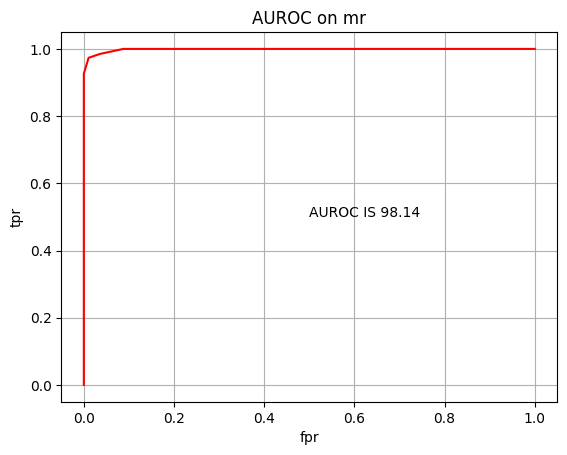

In [73]:
plt.plot(fpr,tpr,color = 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on mr')
plt.grid()
plt.text(x=.5,y=.5, s='AUROC IS 98.14 ')

# feature importance with entropy

In [66]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.11551085,
       0.        , 0.        , 0.16347962, 0.28862422, 0.        ,
       0.0390517 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.39333361,
       0.        , 0.        ])

In [67]:
len(dt.feature_importances_)

22

In [68]:
dt.feature_importances_.sum()

1.0

In [69]:
mr_train_x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [70]:
len(mr_train_x.columns)

22

In [71]:
# creating data frame of three rows
feature_imp= pd.DataFrame({'feature': mr_train_x.columns,'Importance':dt.feature_importances_})
feature_imp

,feature,Importance
0,cap-shape,0.000000
1,cap-surface,0.000000
2,cap-color,0.000000
3,bruises,0.000000
4,odor,0.115511
5,gill-attachment,0.000000
6,gill-spacing,0.000000
7,gill-size,0.163480
8,gill-color,0.288624
9,stalk-shape,0.000000


In [72]:
feature_imp.sort_values('Importance',ascending = False)
# higher the value more importance is the feature 

,feature,Importance
19,spore-print-color,0.393334
8,gill-color,0.288624
7,gill-size,0.163480
4,odor,0.115511
10,stalk-root,0.039052
0,cap-shape,0.000000
13,stalk-color-above-ring,0.000000
20,population,0.000000
18,ring-type,0.000000
17,ring-number,0.000000
